<a href="https://colab.research.google.com/github/jesushzv/UFC_Odds/blob/main/UFC_odds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/IvanVC21/ufc/main/data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE


In [ ]:
df.shape

(5528, 11)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

gender          1288
weight_class    1288
title_bout      1288
Winner          1288
country         1288
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum() 

R_fighter       0
B_fighter       0
R_odds          0
B_odds          0
date            0
location        0
country         0
Winner          0
title_bout      0
weight_class    0
gender          0
dtype: int64

In [ ]:
df2 = df[['date','R_odds', 'B_odds', 'Winner']]
df2.head()



,date,R_odds,B_odds,Winner
0,3/14/2020,-145.0,135.0,Blue
1,3/14/2020,160.0,-170.0,Blue
2,3/14/2020,-345.0,315.0,Red
3,3/14/2020,-137.0,127.0,Blue
4,3/14/2020,-160.0,150.0,Red


In [ ]:
df2['Profit'] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,NaN
1,3/14/2020,160.0,-170.0,Blue,NaN
2,3/14/2020,-345.0,315.0,Red,NaN
3,3/14/2020,-137.0,127.0,Blue,NaN
4,3/14/2020,-160.0,150.0,Red,NaN
...,...,...,...,...,...
4235,3/21/2010,-155.0,135.0,Blue,NaN
4236,3/21/2010,-210.0,175.0,Red,NaN
4237,3/21/2010,-260.0,220.0,Red,NaN
4238,3/21/2010,-420.0,335.0,Red,NaN


In [ ]:
mask = ((df2['R_odds'] > 0) & (df2['Winner'] == 'Red') | (df2['B_odds'] > 0 ) & (df2['Winner'] == 'Blue'))
dog_win = df2[mask]
dog_loss = df2[~mask]


In [ ]:
dog_loss['Profit'] = (-100)
dog_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,R_odds,B_odds,Winner,Profit
1,3/14/2020,160.0,-170.0,Blue,-100
2,3/14/2020,-345.0,315.0,Red,-100
4,3/14/2020,-160.0,150.0,Red,-100
6,3/14/2020,-345.0,315.0,Red,-100
7,3/14/2020,-122.0,112.0,Red,-100
...,...,...,...,...,...
4234,3/21/2010,145.0,-165.0,Blue,-100
4236,3/21/2010,-210.0,175.0,Red,-100
4237,3/21/2010,-260.0,220.0,Red,-100
4238,3/21/2010,-420.0,335.0,Red,-100


In [ ]:
dog_win['Profit'] = dog_win.max(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dog_win

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,135.0
3,3/14/2020,-137.0,127.0,Blue,127.0
5,3/14/2020,-150.0,140.0,Blue,140.0
9,3/14/2020,-140.0,130.0,Blue,130.0
10,3/14/2020,-110.0,100.0,Blue,100.0
...,...,...,...,...,...
4213,3/31/2010,190.0,-230.0,Red,190.0
4218,3/31/2010,173.0,-205.0,Red,173.0
4220,3/27/2010,-150.0,140.0,Blue,140.0
4227,3/27/2010,-160.0,140.0,Blue,140.0


In [ ]:
result = dog_win['Profit'].sum() + dog_loss['Profit'].sum()
print(result)

-43253.0


In [ ]:
print(dog_win['R_odds'].max())
print(dog_win['B_odds'].max())
print(dog_loss['R_odds'].min())
print(dog_loss['B_odds'].min())


655.0
735.0
-1700.0
-1200.0


In [ ]:
dataframes = [dog_win, dog_loss]
df3 = pd.concat(dataframes)

In [ ]:
df3

,date,R_odds,B_odds,Winner,Profit
0,3/14/2020,-145.0,135.0,Blue,135.0
3,3/14/2020,-137.0,127.0,Blue,127.0
5,3/14/2020,-150.0,140.0,Blue,140.0
9,3/14/2020,-140.0,130.0,Blue,130.0
10,3/14/2020,-110.0,100.0,Blue,100.0
...,...,...,...,...,...
4234,3/21/2010,145.0,-165.0,Blue,-100.0
4236,3/21/2010,-210.0,175.0,Red,-100.0
4237,3/21/2010,-260.0,220.0,Red,-100.0
4238,3/21/2010,-420.0,335.0,Red,-100.0


In [ ]:
import datetime 
df3['date'] = pd.to_datetime(df['date'])
df3['date'] = df3['date'].dt.strftime('%Y-%m')

In [ ]:

month_by_month = df3.groupby('date', as_index = 'False').agg({'Profit':'sum'})
month_by_month

,Profit
date,
2010-03,-1632.0
2010-04,505.0
2010-05,990.0
2010-06,281.0
2010-07,-93.0
2010-08,153.0
2010-09,175.0
2010-10,-110.0
2010-11,-65.0


In [ ]:
month_by_month.describe()

,Profit
count,121.000000
mean,-357.462810
std,836.344796
min,-2260.000000
25%,-860.000000
50%,-363.000000
75%,175.000000
max,2398.000000


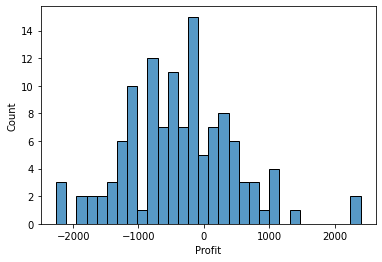

In [ ]:
sns.histplot(data=month_by_month, x='Profit', bins=30)